# 1D CNN (M1)



## Importing modules

In [27]:
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import array
import pandas
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from tensorflow.keras.layers import LSTM
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Convolution1D, ZeroPadding1D, MaxPooling1D, AveragePooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, matthews_corrcoef, f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Nadam
import time
import numpy as np

from matplotlib import pyplot as plt

## Importing DataSet

In [28]:
# Read the CSV file into a pandas DataFrame

dataframe = pandas.read_csv("/home/gerel/Documents/11.DataSet/Datasets_with_port_protocol_project2/ddos_dataset.csv")


## Exploring DataSet

In [29]:
dataframe


,Unnamed: 0,sw11,sw22,sw12,flow_stat,Protocol,source_port,label
0,0,321.464040,276.665291,330.655584,935.549686,17,40423,0
1,1,309.711011,229.390828,276.175688,820.130424,17,40423,0
2,2,388.028008,265.059110,351.008062,1006.247528,17,40423,0
3,3,351.443368,260.581250,346.263900,963.385626,17,40423,0
4,4,312.260013,242.773740,297.274629,846.970095,17,40423,0
...,...,...,...,...,...,...,...,...
104541,104541,224.340118,119.928015,186.242752,526.839055,17,40423,1
104542,104542,415.201915,200.064020,548.021813,1159.145286,17,40423,1
104543,104543,463.785312,188.559746,489.979829,1136.569711,17,40423,1
104544,104544,370.268584,167.753758,498.700647,1044.880801,17,40423,1


In [30]:
dataframe.head()

,Unnamed: 0,sw11,sw22,sw12,flow_stat,Protocol,source_port,label
0,0,321.464040,276.665291,330.655584,935.549686,17,40423,0
1,1,309.711011,229.390828,276.175688,820.130424,17,40423,0
2,2,388.028008,265.059110,351.008062,1006.247528,17,40423,0
3,3,351.443368,260.581250,346.263900,963.385626,17,40423,0
4,4,312.260013,242.773740,297.274629,846.970095,17,40423,0


In [31]:
dataframe.describe()

,Unnamed: 0,sw11,sw22,sw12,flow_stat,Protocol,source_port,label
count,104546.000000,104546.000000,104546.000000,104546.000000,104546.000000,104546.0,104546.0,104546.000000
mean,52272.500000,352.201907,237.309224,336.714896,923.701285,17.0,40423.0,0.299973
std,30179.974959,120.119222,55.028820,132.239182,260.484403,0.0,0.0,0.458248
min,0.000000,152.000000,103.100000,123.400000,3.000000,17.0,40423.0,0.000000
25%,26136.250000,303.148858,207.814786,281.793079,819.361461,17.0,40423.0,0.000000
50%,52272.500000,329.773026,247.161254,323.476374,909.569716,17.0,40423.0,0.000000
75%,78408.750000,378.003544,271.343743,349.905167,1001.550422,17.0,40423.0,1.000000
max,104545.000000,1445.842000,474.158000,1942.632000,2963.550000,17.0,40423.0,1.000000


## Data Preprocessing and Feature-Label Extraction

In [32]:
# Check the shape of the dataset
dataset.shape

# Extract the features (X) and labels (Y) from the DataFrame
# X contains all rows and all columns except the last column
X = dataframe.iloc[:, :-1]

# Y contains all rows and only the last column
Y = dataframe.iloc[:, -1]

# Convert Y (labels) to categorical values using one-hot encoding
Y = to_categorical(Y)

# Convert X to a numpy array
X = array(X[:])

## Feature Scaling and Transformation.

In [33]:
# Initialize a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the data (X) and transform the data using the RobustScaler
X = scaler.fit_transform(X)

## Data Splitting for Training and Testing.

In [34]:
# Split the dataset into training and testing sets
# X_train and X_test are the training and testing features, respectively
# y_train and y_test are the corresponding training and testing labels, respectively
# The test_size parameter determines the proportion of the dataset used for testing (in this case, 30%)
# The random_state parameter ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=109)

'''This line of code uses train_test_split from Scikit-learn to divide the dataset (X and Y) into training and testing sets. It assigns 70% of the data to training (X_train and y_train) and 30% to testing (X_test and y_test). 
The random_state parameter ensures that the data split is reproducible.'''

'This line of code uses train_test_split from Scikit-learn to divide the dataset (X and Y) into training and testing sets. It assigns 70% of the data to training (X_train and y_train) and 30% to testing (X_test and y_test). \nThe random_state parameter ensures that the data split is reproducible.'

In [35]:
X_train.shape

(73182, 7)

## Data Reshaping for Convolutional Neural Network (Conv1D) Input

In [36]:
# Reshape the training and testing features for compatibility with Conv1D model
# X_train is reshaped to have dimensions (samples, features, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# X_test is reshaped to have dimensions (samples, features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [37]:
 X_train.shape


(73182, 7, 1)

In [38]:
 X_test.shape[0]

31364

In [39]:
X_train.shape[1]  #- number of features

7

## Model Architecture Definition

In [40]:
# Create a Sequential model
model = Sequential()

# Define input shape for the first layer based on the input data
layer0_input = (X_train.shape[1], 1)

# Add a 1D convolutional layer with 8 filters, kernel size of 3, using ReLU activation
model.add(Conv1D(filters=8, kernel_size=3, padding='valid', activation='relu', input_shape=layer0_input))

# Add another 1D convolutional layer with 8 filters, kernel size of 2, using ReLU activation
model.add(Conv1D(8, 2, padding='valid', activation='relu'))

# Add one more 1D convolutional layer with 8 filters, kernel size of 2, using ReLU activation
model.add(Conv1D(8, 2, padding='valid', activation='relu'))

# Flatten the output of the convolutional layers
layer4_flatten = model.add(Flatten())

# Add a dense layer with 16 neurons and ReLU activation
layer5_dense = model.add(Dense(16, activation='relu'))

# Add a Dropout layer with 20% dropout rate to prevent overfitting
layer6_Dropout = model.add(Dropout(0.2))

# Add a final dense layer with 2 neurons for classification using softmax activation
model.add(Dense(2, activation='softmax'))








In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5, 8)              32        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 8)              136       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 3, 8)              136       
_________________________________________________________________
flatten_2 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

## Model Hyperparameters Configuration

In [42]:
epoch= 18
batch_size= 128
learning_rate=0.001

## Model Compilation and Configuration

In [43]:
# Initialize the Adam optimizer with a specific learning rate
adam = Adam(learning_rate=learning_rate)

# Compile the model with binary cross-entropy loss for binary classification
# Using the Adam optimizer initialized above and tracking accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



## Training the Model with Early Stopping

In [44]:
#early stopping hiihes epoch-iin toond hurehees omno zogsoj bolno
startTime = time.time()
history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]) 


Epoch 1/18
401/401 [==============================] - 25s 60ms/step - loss: 0.1968 - accuracy: 0.9586 - val_loss: 0.0187 - val_accuracy: 0.9967
Epoch 2/18
401/401 [==============================] - 28s 69ms/step - loss: 0.0204 - accuracy: 0.9959 - val_loss: 0.0113 - val_accuracy: 0.9976
Epoch 3/18
401/401 [==============================] - 26s 66ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 4/18
401/401 [==============================] - 27s 68ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 5/18
401/401 [==============================] - 27s 67ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/18
401/401 [==============================] - 26s 65ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 7/18
401/401 [==============================] - 26s 65ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0016 - val_accuracy:

In [ ]:
## Model Evaluation and Performance Analysis

In [50]:
# Evaluate the model's accuracy on the testing data
# The model.evaluate() function computes the accuracy using the testing features (X_test) and labels (y_test)
# The batch_size parameter determines the number of samples per gradient update
accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

# Print the accuracy achieved by the model on the testing data
print('Accuracy:', accuracy)

# Calculate and print the total time taken for the process to run
# time.time() returns the current time, and startTime stores the initial time
print("This Process run %s seconds" % str(time.time() - startTime))


Accuracy: [0.0005091042839922011, 0.999808669090271]
This Process run 978.0278453826904 seconds


## Visualization of Training and Validation Accuracy Trends

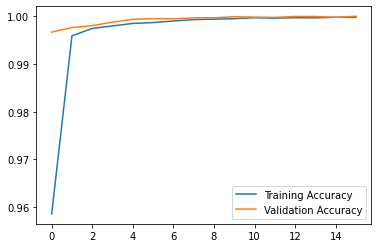

In [46]:
# Plotting the training and validation accuracy over epochs

# Plot the training accuracy stored in the 'accuracy' key of the history object
plt.plot(history.history["accuracy"], label="Training Accuracy")

# Plot the validation accuracy stored in the 'val_accuracy' key of the history object
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")

# Adding a legend to the plot to differentiate between training and validation accuracy
plt.legend()

# Display the plot
plt.show()



## Visualization of Training and Validation Loss Trends

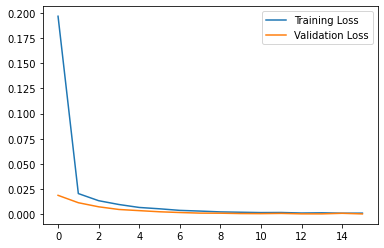

In [47]:
# Plotting the training and validation loss over epochs

# Plot the training loss stored in the 'loss' key of the history object
plt.plot(history.history["loss"], label="Training Loss")

# Plot the validation loss stored in the 'val_loss' key of the history object
plt.plot(history.history["val_loss"], label="Validation Loss")

# Adding a legend to the plot to differentiate between training and validation loss
plt.legend()

# Display the plot
plt.show()


# Model performance evaluation

In [48]:

def calc(target, predicted, num_class=2):
    # Calculate various evaluation metrics
    Acc = accuracy_score(target, predicted)  # Accuracy
    Pre = precision_score(target, predicted)  # Precision
    Rec = recall_score(target, predicted)  # Recall
    F1_Score = f1_score(target, predicted)  # F1 Score
    MCC = matthews_corrcoef(target, predicted)  # Matthews Correlation Coefficient
    # Generate confusion matrix as a string for display purposes
    conf_matrix = str(confusion_matrix(target, predicted)).replace('\n', ',')
    # Return evaluation metrics as a NumPy array
    return np.array([Acc, Pre, Rec, F1_Score, MCC, conf_matrix])





In [49]:
# Predict using the trained model on the testing data
predicted_y = model.predict(X_test, verbose=2)

# Calculate evaluation metrics using the calc function
[Acc, Pre, Rec, F1_Score, MCC, conf_matrix] = calc(np.argmax(y_test, axis=1), np.argmax(predicted_y, axis=1))

# Print evaluation metrics (converted to string for printing)
print("Acc " + str(Acc))
print("Pre " + str(Pre))
print("Rec " + str(Rec))
print("F1_Score " + str(F1_Score))
print("MCC " + str(MCC))
print("conf_matrix " + conf_matrix)
# 

981/981 - 2s
Acc 0.9998086978701696
Pre 0.9997881804702393
Rec 0.9995764506565015
F1_Score 0.9996823043524303
MCC 0.9995454607576147
conf_matrix [[21918     2], [    4  9440]]
